In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf



In [2]:
data = pd.read_csv('/content/Android_Malware.csv')
data = data.sample(n=30000)
data.head()

<ipython-input-2-543a9e897de1>:1: DtypeWarning: Columns (56,58,63) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/Android_Malware.csv')


,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
158969,1860,10.42.0.151-119.146.74.48-48658-443-6,10.42.0.151,48658,119.146.74.48,443.0,6.0,22/06/2017 03:05:28,35940321,10,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Scareware
39470,1090,180.149.153.234-10.42.0.211-80-55248-6,10.42.0.211,55248,180.149.153.234,80.0,6.0,14/06/2017 09:57:56,14130,2,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
226584,1759,220.243.219.55-10.42.0.211-80-51646-6,10.42.0.211,51646,220.243.219.55,80.0,6.0,28/06/2017 01:27:30,8681206,2,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Scareware
198940,3038,172.217.10.34-10.42.0.211-443-52865-6,172.217.10.34,443,10.42.0.211,52865.0,6.0,26/06/2017 12:21:25,2144,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Scareware
35916,1432,10.42.0.211-23.21.56.63-42945-443-6,10.42.0.211,42945,23.21.56.63,443.0,6.0,14/06/2017 08:18:54,16950975,7,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware


In [3]:
data.dtypes

,0
Unnamed: 0,int64
Flow ID,object
Source IP,object
Source Port,int64
Destination IP,object
...,...
Idle Mean,float64
Idle Std,float64
Idle Max,float64
Idle Min,float64


In [4]:
data = data.drop(columns=['Unnamed: 0'])

In [5]:
data

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
158969,10.42.0.151-119.146.74.48-48658-443-6,10.42.0.151,48658,119.146.74.48,443.0,6.0,22/06/2017 03:05:28,35940321,10,6,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Scareware
39470,180.149.153.234-10.42.0.211-80-55248-6,10.42.0.211,55248,180.149.153.234,80.0,6.0,14/06/2017 09:57:56,14130,2,0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
226584,220.243.219.55-10.42.0.211-80-51646-6,10.42.0.211,51646,220.243.219.55,80.0,6.0,28/06/2017 01:27:30,8681206,2,0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Scareware
198940,172.217.10.34-10.42.0.211-443-52865-6,172.217.10.34,443,10.42.0.211,52865.0,6.0,26/06/2017 12:21:25,2144,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Scareware
35916,10.42.0.211-23.21.56.63-42945-443-6,10.42.0.211,42945,23.21.56.63,443.0,6.0,14/06/2017 08:18:54,16950975,7,6,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26878,10.42.0.211-10.42.0.1-5134-53-17,10.42.0.211,5134,10.42.0.1,53.0,17.0,14/06/2017 05:02:24,30954,1,1,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
186835,10.42.0.151-123.125.115.164-55514-443-6,10.42.0.151,55514,123.125.115.164,443.0,6.0,23/06/2017 04:31:12,20210350,2,0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Scareware
353580,203.205.158.60-10.42.0.211-80-44068-6,203.205.158.60,80,10.42.0.211,44068.0,6.0,17/06/2017 12:29:45,40,2,0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
348520,10.42.0.151-10.42.0.1-1125-53-17,10.42.0.151,1125,10.42.0.1,53.0,17.0,16/06/2017 09:04:28,51017,1,1,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
      if data[col].apply(type).nunique() > 1:
          data[col] = data[col].astype(str)
    data[col] = le.fit_transform(data[col])
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
for y_el in y_train:
  print(le.inverse_transform([y_el]))

Streaming output truncated to the last 5000 lines.
[3]
[1]
[0]
[0]
[2]
[0]
[3]
[2]
[0]
[1]
[1]
[1]
[1]
[3]
[2]
[0]
[2]
[0]
[3]
[2]
[0]
[2]
[2]
[2]
[1]
[0]
[1]
[0]
[1]
[2]
[1]
[2]
[0]
[1]
[2]
[1]
[1]
[0]
[0]
[0]
[2]
[0]
[0]
[3]
[2]
[0]
[0]
[2]
[2]
[2]
[0]
[1]
[0]
[0]
[1]
[0]
[2]
[2]
[2]
[0]
[0]
[0]
[1]
[0]
[1]
[1]
[2]
[2]
[0]
[3]
[2]
[2]
[0]
[2]
[0]
[2]
[0]
[3]
[0]
[0]
[0]
[1]
[1]
[0]
[2]
[0]
[3]
[0]
[0]
[0]
[2]
[2]
[1]
[0]
[1]
[0]
[3]
[0]
[0]
[1]
[0]
[1]
[0]
[2]
[0]
[1]
[2]
[0]
[2]
[0]
[2]
[1]
[3]
[1]
[2]
[0]
[1]
[3]
[0]
[1]
[0]
[2]
[2]
[2]
[1]
[0]
[2]
[2]
[2]
[2]
[0]
[0]
[2]
[0]
[0]
[0]
[1]
[2]
[0]
[0]
[0]
[2]
[2]
[2]
[1]
[0]
[0]
[1]
[2]
[0]
[1]
[0]
[2]
[2]
[2]
[0]
[2]
[0]
[1]
[2]
[0]
[3]
[0]
[0]
[2]
[2]
[2]
[0]
[2]
[2]
[1]
[1]
[0]
[1]
[3]
[0]
[2]
[0]
[1]
[2]
[1]
[0]
[2]
[0]
[2]
[2]
[1]
[2]
[2]
[2]
[0]
[1]
[1]
[0]
[1]
[2]
[0]
[0]
[0]
[2]
[2]
[2]
[0]
[2]
[0]
[3]
[1]
[1]
[0]
[1]
[2]
[2]
[0]
[2]
[2]
[0]
[0]
[0]
[0]
[2]
[1]
[0]
[0]
[2]
[2]
[0]
[2]
[1]
[1]
[0]
[1]
[2]
[0]
[0]
[1]
[2]
[3]
[

In [8]:
X_train
 # Verifying that data is shuffled


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
337067,12639,4,7431,1314,8,1,10477,2968,0,2,...,0,7,0,0,0,0,0,0,0,0
166512,17311,3,15135,483,16,1,12043,24936,6,8,...,3,7,2745,0,2610,2779,2278,0,2149,2360
205603,6788,4,1424,5,2,2,14065,6181,0,1,...,0,7,0,0,0,0,0,0,0,0
127338,20615,4,12496,796,8,1,9234,22678,1,0,...,1,7,0,0,0,0,0,0,0,0
130979,15213,4,4256,2149,8,1,9506,21434,8,10,...,3,7,518,0,476,706,1319,0,1217,1549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87188,4258,3,16511,294,8,1,6694,24023,1,0,...,0,5,0,0,0,0,0,0,0,0
226471,11365,4,8623,242,4,1,16170,21831,3,1,...,0,5,0,0,0,0,0,0,0,0
256705,20594,4,5522,793,8,1,14854,21395,5,4,...,2,7,0,0,0,0,0,0,0,0
271131,25197,5,10506,1114,4,1,17042,12005,2,3,...,1,5,0,0,0,0,0,0,0,0


['Benign' 'Android_Scareware' 'Android_Scareware' ... 'Android_Scareware'
 'Android_SMS_Malware' 'Android_Adware']


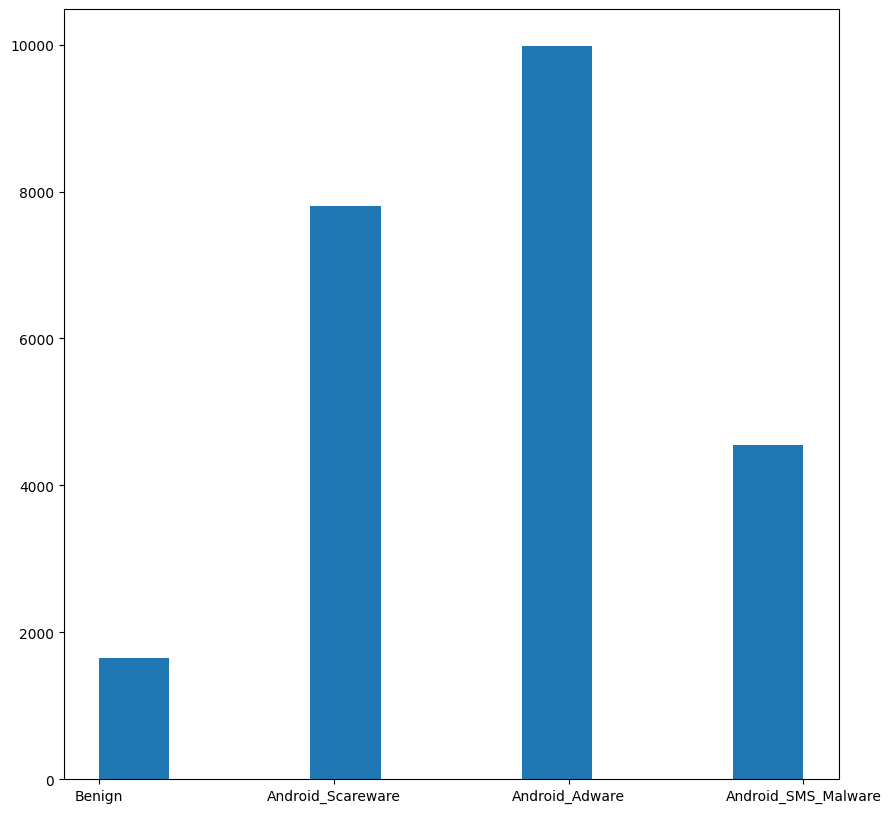

In [9]:
plt.figure(figsize=(10,10))
print(le.inverse_transform(y_train))
plt.hist(le.inverse_transform(y_train))
plt.show()

In [10]:
X_train

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
337067,12639,4,7431,1314,8,1,10477,2968,0,2,...,0,7,0,0,0,0,0,0,0,0
166512,17311,3,15135,483,16,1,12043,24936,6,8,...,3,7,2745,0,2610,2779,2278,0,2149,2360
205603,6788,4,1424,5,2,2,14065,6181,0,1,...,0,7,0,0,0,0,0,0,0,0
127338,20615,4,12496,796,8,1,9234,22678,1,0,...,1,7,0,0,0,0,0,0,0,0
130979,15213,4,4256,2149,8,1,9506,21434,8,10,...,3,7,518,0,476,706,1319,0,1217,1549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87188,4258,3,16511,294,8,1,6694,24023,1,0,...,0,5,0,0,0,0,0,0,0,0
226471,11365,4,8623,242,4,1,16170,21831,3,1,...,0,5,0,0,0,0,0,0,0,0
256705,20594,4,5522,793,8,1,14854,21395,5,4,...,2,7,0,0,0,0,0,0,0,0
271131,25197,5,10506,1114,4,1,17042,12005,2,3,...,1,5,0,0,0,0,0,0,0,0


In [11]:

tf.random.set_seed(42)

multi_classification_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

multi_classification_model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                                     optimizer=tf.keras.optimizers.Adam(),
                                     metrics=['accuracy'])

non_normalized_history = multi_classification_model_1.fit(X_train, y_train, epochs=40,validation_data=(X_test, y_test))



Epoch 1/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3291 - loss: 1132.6107 - val_accuracy: 0.4107 - val_loss: 3.0556
Epoch 2/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4182 - loss: 2.0390 - val_accuracy: 0.4107 - val_loss: 1.2830
Epoch 3/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4189 - loss: 1.2753 - val_accuracy: 0.4107 - val_loss: 1.2373
Epoch 4/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4185 - loss: 1.2408 - val_accuracy: 0.4103 - val_loss: 1.2206
Epoch 5/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4186 - loss: 1.2327 - val_accuracy: 0.4103 - val_loss: 1.2207
Epoch 6/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4186 - loss: 1.2327 - val_accuracy: 0.4103 - val_loss: 1.2211
Epoch 7/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4186 - loss: 1.2327 - val_accuracy: 0.4103 - val_loss: 1.2214
Epoch 8/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4186 - loss: 1.2327 - val_accuracy:

# Improving Model


In [13]:
X_train.min(), X_train.max()

(Flow ID              1
  Source IP           0
  Source Port         0
  Destination IP      2
  Destination Port    0
                     ..
  Active Min          0
 Idle Mean            0
  Idle Std            0
  Idle Max            0
  Idle Min            0
 Length: 84, dtype: int64,
 Flow ID              27583
  Source IP             946
  Source Port         18307
  Destination IP       2274
  Destination Port     2886
                      ...  
  Active Min           3227
 Idle Mean             3444
  Idle Std              791
  Idle Max             3444
  Idle Min             3444
 Length: 84, dtype: int64)

In [14]:
X_train_normalized = X_train /  1705248262
X_test_normalized = X_test /  1705248262

# Check min and max of scaled data
X_train_normalized.min(), X_train_normalized.max()

(Flow ID              5.864249e-10
  Source IP           0.000000e+00
  Source Port         0.000000e+00
  Destination IP      1.172850e-09
  Destination Port    0.000000e+00
                          ...     
  Active Min          0.000000e+00
 Idle Mean            0.000000e+00
  Idle Std            0.000000e+00
  Idle Max            0.000000e+00
  Idle Min            0.000000e+00
 Length: 84, dtype: float64,
 Flow ID              1.617536e-05
  Source IP           5.547579e-07
  Source Port         1.073568e-05
  Destination IP      1.333530e-06
  Destination Port    1.692422e-06
                          ...     
  Active Min          1.892393e-06
 Idle Mean            2.019647e-06
  Idle Std            4.638621e-07
  Idle Max            2.019647e-06
  Idle Min            2.019647e-06
 Length: 84, dtype: float64)

In [15]:
tf.random.set_seed(42)

normalized_history = multi_classification_model_1.fit(X_train_normalized, y_train, epochs=40,validation_data=(X_test_normalized, y_test))

Epoch 1/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4183 - loss: 1.2331 - val_accuracy: 0.4105 - val_loss: 1.2186
Epoch 2/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4183 - loss: 1.2330 - val_accuracy: 0.4105 - val_loss: 1.2186
Epoch 3/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4183 - loss: 1.2330 - val_accuracy: 0.4105 - val_loss: 1.2186
Epoch 4/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4183 - loss: 1.2330 - val_accuracy: 0.4105 - val_loss: 1.2186
Epoch 5/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4183 - loss: 1.2330 - val_accuracy: 0.4105 - val_loss: 1.2186
Epoch 6/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4183 - loss: 1.2330 - val_accuracy: 0.4105 - val_loss: 1.2186
Epoch 7/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4183 - loss: 1.2330 - val_accuracy: 0.4105 - val_loss: 1.2186
Epoch 8/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4183 - loss: 1.2330 - val_accuracy: 0.